<a href="https://colab.research.google.com/github/OmG001/HandWritten_digit_recog/blob/main/Handwritten_digit_recognisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


In [ ]:
# Reshape the images
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

# Normalize the pixel values to the range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# One-hot encode the labels
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1732 - accuracy: 0.9491 - val_loss: 0.0674 - val_accuracy: 0.9789
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0611 - accuracy: 0.9818 - val_loss: 0.0529 - val_accuracy: 0.9822
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0420 - accuracy: 0.9869 - val_loss: 0.0463 - val_accuracy: 0.9834
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 0.0476 - val_accuracy: 0.9847
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0225 - accuracy: 0.9930 - val_loss: 0.0418 - val_accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.0620 - val_accuracy: 0.9825
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0122 - accuracy: 0.9962 - val_loss: 0.0517 -

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.0475 - accuracy: 0.9871
Test Loss: 0.047496382147073746
Test Accuracy: 0.9871000051498413


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [ ]:
# Select a few random samples from the training and testing sets
num_samples = 6  # Number of samples to display
random_train_indices = np.random.randint(0, len(train_images), num_samples)
random_test_indices = np.random.randint(0, len(test_images), num_samples)

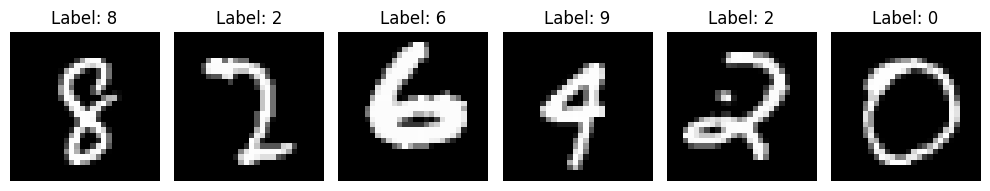

In [ ]:
# Display the sample training images
plt.figure(figsize=(10, 4))
for i, index in enumerate(random_train_indices):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(train_images[index], cmap='gray')
    plt.title(f"Label: {train_labels[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

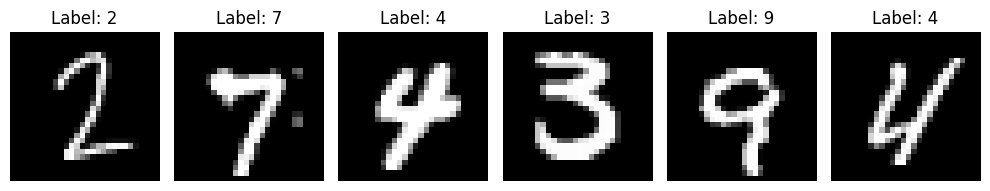

In [ ]:
# Display the sample testing images
plt.figure(figsize=(10, 4))
for i, index in enumerate(random_test_indices):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(test_images[index], cmap='gray')
    plt.title(f"Label: {test_labels[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()